# **Sentiment analysis for Tim_Hortons At Malden Road**

In [275]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")

In [276]:
df = pd.read_excel('/content/Malden_Reviews.xlsx')
df.head()

,User_name,Review_text
0,Shawn M,I can't stress enough how much I dislike Tim H...
1,Mian Inayatullah,1st time came here. Very clean and quick servi...
2,Hailey Blok,Love this Tim Hortons! I’m a steeped tea drink...
3,Adel Almaaz,I ordered a double toasted bagel and thats wha...
4,Rick Moffat,EDIT: I followed up with them as they suggest...


In [277]:
print(df.shape)

(377, 2)


In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 377 entries, 0 to 376
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_name    377 non-null    object
 1   Review_text  377 non-null    object
dtypes: object(2)
memory usage: 6.0+ KB


In [279]:
df.isnull().sum()

,0
User_name,0
Review_text,0


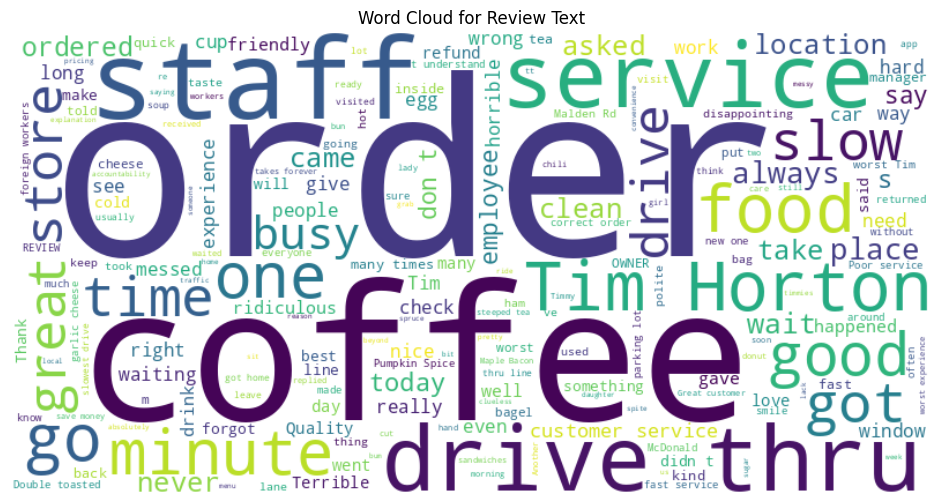

In [280]:
#Visualizes the most common words in the review text.

from wordcloud import WordCloud

review_text_combined = " ".join(df['Review_text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(review_text_combined)

plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Review Text")
plt.show()

# **Natural Language Processing**

**Basic Text Pre-Processing**
1. Stop-Word Removal : In English words like a, an, the, as, in, on, etc. are considered as stop-words so according to our requirements we can remove them to reduce vocabulary size as these words don't have some specific meaning

2. Lower Casing : Convert all words into the lower case because the upper or lower case may not make a difference for the problem. And we are reducing vocabulary size by doing so.

3. Stemming : Stemming refers to the process of removing suffixes and reducing a word to some base form such that all different variants of that word can be represented by the same form (e.g., “walk” and “walking” are both reduced to “walk”).

4. Tokenization : NLP software typically analyzes text by breaking it up into words (tokens) and sentences.

In [281]:
!pip install nltk

In [282]:
import pandas as pd
import re
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [283]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt') # tokenizer model for tokenization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [284]:
# Define custom stopwords
custom_stopwords = [
    'tim', 'hortons', 'store', 'location', 'tims', 'place', 'order', 'orders',
    'food', 'drink', 'staff', 'service', 'one', 'got', 'get', 'go', 'went',
    'came', 'asked', 'even', 'every', 'always', 'never', 'make', 'made', 'wait',
    'waiting', 'minutes', 'time', 'today', 'day', 'morning', 'night', 'back',
] + stopwords.words('english')

In [285]:
# Text cleaning function
def clean_text(text):
    if pd.isnull(text):
        return ""
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    return text

In [286]:
# Remove stopwords
def remove_stopwords(text):
    tokens = word_tokenize(text)
    return " ".join([word for word in tokens if word not in custom_stopwords and len(word) > 1])

In [287]:
# Apply text cleaning and stopword removal to the 'review_text' column
df['cleaned_text'] = df['Review_text'].apply(clean_text)
df['no_stopwords'] = df['cleaned_text'].apply(remove_stopwords)

In [288]:
# Tokenize the text
df['tokens'] = df['no_stopwords'].apply(word_tokenize)

# Save the processed data (optional)
df.to_csv('processed_dataset.csv', index=False)

# Display the cleaned data
print(df[['Review_text', 'cleaned_text', 'no_stopwords', 'tokens']].head())

                                         Review_text  \
0  I can't stress enough how much I dislike Tim H...   
1  1st time came here. Very clean and quick servi...   
2  Love this Tim Hortons! I’m a steeped tea drink...   
3  I ordered a double toasted bagel and thats wha...   
4  EDIT:  I followed up with them as they suggest...   

                                        cleaned_text  \
0  i cant stress enough how much i dislike tim ho...   
1  st time came here very clean and quick service...   
2  love this tim hortons im a steeped tea drinker...   
3  i ordered a double toasted bagel and thats wha...   
4  edit  i followed up with them as they suggeste...   

                                        no_stopwords  \
0  cant stress enough much dislike quality plumme...   
1      st clean quick nice professional thanks great   
2  love im steeped tea drinker let say ive locati...   
3  ordered double toasted bagel thats received re...   
4  edit followed suggested response several qu

In [289]:
df['final_text']= df.Review_text.apply(clean_text).apply(remove_stopwords).apply(word_tokenize)
df.final_text.head()

,final_text
0,"[cant, stress, enough, much, dislike, quality,..."
1,"[st, clean, quick, nice, professional, thanks,..."
2,"[love, im, steeped, tea, drinker, let, say, iv..."
3,"[ordered, double, toasted, bagel, thats, recei..."
4,"[edit, followed, suggested, response, several,..."


# **Text Analysis**

In [290]:
import nltk
nltk.download('vader_lexicon') # tool that detect the sentiment polarity (positive, negative, or neutral) of text
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer() #class from vader library
vader.polarity_scores(" ".join(df.final_text[0])) #calculates sentiment scores for the input string

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.274, 'neu': 0.506, 'pos': 0.22, 'compound': -0.069}

In [291]:
print(df.Review_text[3])
print(vader.polarity_scores(df.Review_text[3]))

I ordered a double toasted bagel and thats what I received, and then as I returned to the window, they gave me a new one and the employee asked to have the burnt one back with an extremely rude attitude!!!
{'neg': 0.109, 'neu': 0.891, 'pos': 0.0, 'compound': -0.6333}


In [292]:
# Define function for sentiment category classification
def sentiment_category(compound_score):
    if compound_score >= 0.05:
        return "positive"
    elif compound_score <= -0.05:
        return "negative"
    else:
        return "neutral"

# Apply VADER sentiment analysis and process the dataset and create new colomn
df['vader_scores'] = df['final_text'].apply(lambda x: vader.polarity_scores(" ".join(x)))
df['vader_neg'] = df['vader_scores'].apply(lambda score: score['neg'])
df['vader_neu'] = df['vader_scores'].apply(lambda score: score['neu'])
df['vader_pos'] = df['vader_scores'].apply(lambda score: score['pos'])
df['vader_compound'] = df['vader_scores'].apply(lambda score: score['compound'])
df['vader_sentiment'] = df['vader_compound'].apply(sentiment_category)

# Display a sample of the results
print(df[['final_text', 'vader_compound', 'vader_sentiment']].head())

                                          final_text  vader_compound  \
0  [cant, stress, enough, much, dislike, quality,...         -0.0690   
1  [st, clean, quick, nice, professional, thanks,...          0.9100   
2  [love, im, steeped, tea, drinker, let, say, iv...          0.9260   
3  [ordered, double, toasted, bagel, thats, recei...         -0.5095   
4  [edit, followed, suggested, response, several,...          0.4404   

  vader_sentiment  
0        negative  
1        positive  
2        positive  
3        negative  
4        positive  


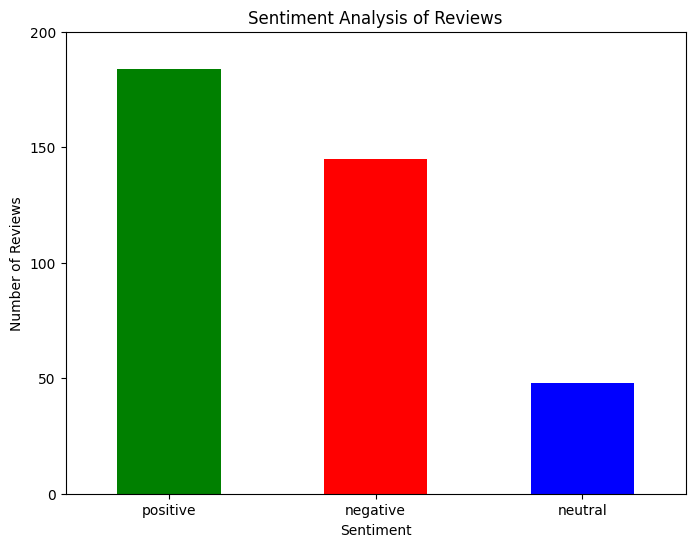

In [293]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment category
sentiment_counts = df['vader_sentiment'].value_counts()

# Custom color mapping
color_map = {'positive': 'green', 'negative': 'red', 'neutral': 'blue'}
colors = [color_map[sentiment] for sentiment in sentiment_counts.index]

# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=colors)
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)

# Set y-axis scale
max_count = sentiment_counts.max()
plt.yticks(range(0, max_count + 51, 50))

plt.show()


In [294]:
df.head()

,User_name,Review_text,cleaned_text,no_stopwords,tokens,final_text,vader_scores,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment
0,Shawn M,I can't stress enough how much I dislike Tim H...,i cant stress enough how much i dislike tim ho...,cant stress enough much dislike quality plumme...,"[cant, stress, enough, much, dislike, quality,...","[cant, stress, enough, much, dislike, quality,...","{'neg': 0.274, 'neu': 0.506, 'pos': 0.22, 'com...",0.274,0.506,0.220,-0.0690,negative
1,Mian Inayatullah,1st time came here. Very clean and quick servi...,st time came here very clean and quick service...,st clean quick nice professional thanks great,"[st, clean, quick, nice, professional, thanks,...","[st, clean, quick, nice, professional, thanks,...","{'neg': 0.0, 'neu': 0.194, 'pos': 0.806, 'comp...",0.000,0.194,0.806,0.9100,positive
2,Hailey Blok,Love this Tim Hortons! I’m a steeped tea drink...,love this tim hortons im a steeped tea drinker...,love im steeped tea drinker let say ive locati...,"[love, im, steeped, tea, drinker, let, say, iv...","[love, im, steeped, tea, drinker, let, say, iv...","{'neg': 0.0, 'neu': 0.528, 'pos': 0.472, 'comp...",0.000,0.528,0.472,0.9260,positive
3,Adel Almaaz,I ordered a double toasted bagel and thats wha...,i ordered a double toasted bagel and thats wha...,ordered double toasted bagel thats received re...,"[ordered, double, toasted, bagel, thats, recei...","[ordered, double, toasted, bagel, thats, recei...","{'neg': 0.19, 'neu': 0.81, 'pos': 0.0, 'compou...",0.190,0.810,0.000,-0.5095,negative
4,Rick Moffat,EDIT: I followed up with them as they suggest...,edit i followed up with them as they suggeste...,edit followed suggested response several quest...,"[edit, followed, suggested, response, several,...","[edit, followed, suggested, response, several,...","{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...",0.000,0.805,0.195,0.4404,positive


# **Machine Learning approach**
ML approach is also known as Document Classificaton. It uses ML algorithm to classify the text data.

The most important in ML approach is to convert the text to the vector or other numeric format to make the algorithms understand the text as a feature.

Vectorization : CountVectorizer, TfidfTransformer

Model: Logistic Regression, RandomForest, SupportVectorMachine

In [295]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [296]:
df.final_text

,final_text
0,"[cant, stress, enough, much, dislike, quality,..."
1,"[st, clean, quick, nice, professional, thanks,..."
2,"[love, im, steeped, tea, drinker, let, say, iv..."
3,"[ordered, double, toasted, bagel, thats, recei..."
4,"[edit, followed, suggested, response, several,..."
...,...
372,"[issues, busy, makes, times, longer, people, d..."
373,"[waited, around, lady, forgot, isnt, first, te..."
374,"[recently, renovated, believe, nice, interior,..."
375,"[essentially, like, however, guy, serving, did..."


In [297]:
# Combines the list of tokens (words) into a single string, with a space as the separator.
for i in range(len(df)):
    df['final_text'][i] = " ".join(df['final_text'][i])

In [298]:
df['final_text'][:3]

,final_text
0,cant stress enough much dislike quality plumme...
1,st clean quick nice professional thanks great
2,love im steeped tea drinker let say ive locati...


In [299]:
# Define a mapping for sentiment text to numerical values
sentiment_mapping = {
    'positive': 1,
    'neutral': 2,
    'negative': 0
}

# Overwrite the vader_sentiment column with numerical values
df['vader_sentiment'] = df.vader_sentiment.map(sentiment_mapping)

# Verify the transformation
print(df.vader_sentiment.head())

0    0
1    1
2    1
3    0
4    1
Name: vader_sentiment, dtype: int64


In [300]:
X = df.final_text
y = df.vader_sentiment

print(X.head())
print(y.head())

0    cant stress enough much dislike quality plumme...
1        st clean quick nice professional thanks great
2    love im steeped tea drinker let say ive locati...
3    ordered double toasted bagel thats received re...
4    edit followed suggested response several quest...
Name: final_text, dtype: object
0    0
1    1
2    1
3    0
4    1
Name: vader_sentiment, dtype: int64


In [301]:
df.head()

,User_name,Review_text,cleaned_text,no_stopwords,tokens,final_text,vader_scores,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment
0,Shawn M,I can't stress enough how much I dislike Tim H...,i cant stress enough how much i dislike tim ho...,cant stress enough much dislike quality plumme...,"[cant, stress, enough, much, dislike, quality,...",cant stress enough much dislike quality plumme...,"{'neg': 0.274, 'neu': 0.506, 'pos': 0.22, 'com...",0.274,0.506,0.220,-0.0690,0
1,Mian Inayatullah,1st time came here. Very clean and quick servi...,st time came here very clean and quick service...,st clean quick nice professional thanks great,"[st, clean, quick, nice, professional, thanks,...",st clean quick nice professional thanks great,"{'neg': 0.0, 'neu': 0.194, 'pos': 0.806, 'comp...",0.000,0.194,0.806,0.9100,1
2,Hailey Blok,Love this Tim Hortons! I’m a steeped tea drink...,love this tim hortons im a steeped tea drinker...,love im steeped tea drinker let say ive locati...,"[love, im, steeped, tea, drinker, let, say, iv...",love im steeped tea drinker let say ive locati...,"{'neg': 0.0, 'neu': 0.528, 'pos': 0.472, 'comp...",0.000,0.528,0.472,0.9260,1
3,Adel Almaaz,I ordered a double toasted bagel and thats wha...,i ordered a double toasted bagel and thats wha...,ordered double toasted bagel thats received re...,"[ordered, double, toasted, bagel, thats, recei...",ordered double toasted bagel thats received re...,"{'neg': 0.19, 'neu': 0.81, 'pos': 0.0, 'compou...",0.190,0.810,0.000,-0.5095,0
4,Rick Moffat,EDIT: I followed up with them as they suggest...,edit i followed up with them as they suggeste...,edit followed suggested response several quest...,"[edit, followed, suggested, response, several,...",edit followed suggested response several quest...,"{'neg': 0.0, 'neu': 0.805, 'pos': 0.195, 'comp...",0.000,0.805,0.195,0.4404,1


In [302]:
#define models
model_params = {'random_state':42}
model_list = [LogisticRegression(**model_params, solver='liblinear'),
              RandomForestClassifier(**model_params),
              SVC(**model_params)]
model_names = ['LogisticRegression', 'RandomForest', 'SupportVectorMachine']

#Converts text into a matrix of token counts (bag-of-words).
c = CountVectorizer()
X_c = c.fit_transform(X)

#Converts text into a matrix of term frequency-inverse document frequency (TF-IDF) values.
tf = TfidfVectorizer()
X_tf = tf.fit_transform(X)

#cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#traing and validation
for model, model_name in zip(model_list, model_names):
    for n_fold, (trn_idx, vld_idx) in enumerate(skf.split(df.index, df.vader_sentiment)):
        X_c_trn = X_c[trn_idx]#train using train indices
        X_tf_trn = X_tf[trn_idx]
        y_trn = df.loc[trn_idx, 'vader_sentiment']

        X_c_vld = X_c[vld_idx]#validate using validate indices
        X_tf_vld = X_tf[vld_idx]
        y_vld = df.loc[vld_idx, 'vader_sentiment']

        model.fit(X_c_trn, y_trn)
        c_pred_col = f"{model_name}_ct_pred"
        df.loc[vld_idx, c_pred_col] = model.predict(X_c_vld)

        model.fit(X_tf_trn, y_trn)
        tf_pred_col = f"{model_name}_tf_pred"
        df.loc[vld_idx, tf_pred_col] = model.predict(X_tf_vld)

    #accuracy calculation
    print(f"Model: {model_name}, CountVectorizer, Accuracy: {accuracy_score(df.vader_sentiment, df[c_pred_col]):.2%}")
    print(f"Model: {model_name}, TfidfVectorizer, Accuracy: {accuracy_score(df.vader_sentiment, df[tf_pred_col]):.2%}\n")


Model: LogisticRegression, CountVectorizer, Accuracy: 88.06%
Model: LogisticRegression, TfidfVectorizer, Accuracy: 85.15%

Model: RandomForest, CountVectorizer, Accuracy: 87.80%
Model: RandomForest, TfidfVectorizer, Accuracy: 87.00%

Model: SupportVectorMachine, CountVectorizer, Accuracy: 86.47%
Model: SupportVectorMachine, TfidfVectorizer, Accuracy: 87.80%



#**Sentiment analysis for Tim_Hortons At University Avenue**

In [303]:
#import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import warnings
warnings.filterwarnings("ignore")

In [304]:
df = pd.read_excel('/content/University Ave_Reviews.xlsx')
df.head()

,User_name,Review_text
0,Sharu Joseph John,Had a great experience at Tim Hortons thanks t...
1,Sumit Toliya,Burnt Bagel at Tim Hortons\n\nAs a regular cus...
2,Lynn Anne,This review is for Lee Ann and Austin.\nI just...
3,Harshil Chudasama,"Lee Ann is a vibrant and dynamic individual, s..."
4,Aleena mery Shibu,I had an absolutely wonderful experience at th...


In [305]:
print(df.shape)

(287, 2)


In [306]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   User_name    287 non-null    object
 1   Review_text  287 non-null    object
dtypes: object(2)
memory usage: 4.6+ KB


In [307]:
df.isnull().sum()

,0
User_name,0
Review_text,0


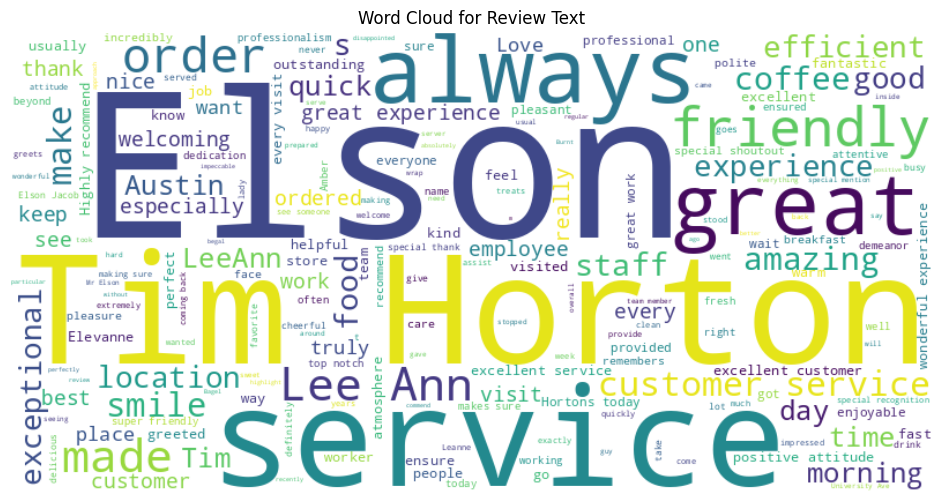

In [308]:
#Visualizes the most common words in the review text.

from wordcloud import WordCloud

review_text_combined = " ".join(df['Review_text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(review_text_combined)

plt.figure(figsize=(14, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Review Text")
plt.show()

# **Natural Language Processing**

**Basic Text Pre-Processing**
1. Stop-Word Removal : In English words like a, an, the, as, in, on, etc. are considered as stop-words so according to our requirements we can remove them to reduce vocabulary size as these words don't have some specific meaning

2. Lower Casing : Convert all words into the lower case because the upper or lower case may not make a difference for the problem. And we are reducing vocabulary size by doing so.

3. Stemming : Stemming refers to the process of removing suffixes and reducing a word to some base form such that all different variants of that word can be represented by the same form (e.g., “walk” and “walking” are both reduced to “walk”).

4. Tokenization : NLP software typically analyzes text by breaking it up into words (tokens) and sentences.

In [309]:
!pip install nltk

In [310]:
import pandas as pd
import re
import nltk
nltk.download('punkt_tab')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [311]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt') # tokenizer model for tokenization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [312]:
# Define custom stopwords
custom_stopwords = [
    'tim', 'hortons', 'store', 'location', 'tims', 'place', 'order', 'orders',
    'food', 'drink', 'staff', 'service', 'one', 'got', 'get', 'go', 'went',
    'came', 'asked', 'even', 'every', 'always', 'never', 'make', 'made', 'wait',
    'waiting', 'minutes', 'time', 'today', 'day', 'morning', 'night', 'back',
] + stopwords.words('english')

In [313]:
# Text cleaning function
def clean_text(text):
    if pd.isnull(text):
        return ""
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    return text

In [314]:
# Remove stopwords
def remove_stopwords(text):
    tokens = word_tokenize(text)
    return " ".join([word for word in tokens if word not in custom_stopwords and len(word) > 1])

In [315]:
# Apply text cleaning and stopword removal to the 'review_text' column
df['cleaned_text'] = df['Review_text'].apply(clean_text)
df['no_stopwords'] = df['cleaned_text'].apply(remove_stopwords)

In [316]:
# Tokenize the text
df['tokens'] = df['no_stopwords'].apply(word_tokenize)

# Save the processed data (optional)
df.to_csv('processed_dataset.csv', index=False)

# Display the cleaned data
print(df[['Review_text', 'cleaned_text', 'no_stopwords', 'tokens']].head())

                                         Review_text  \
0  Had a great experience at Tim Hortons thanks t...   
1  Burnt Bagel at Tim Hortons\n\nAs a regular cus...   
2  This review is for Lee Ann and Austin.\nI just...   
3  Lee Ann is a vibrant and dynamic individual, s...   
4  I had an absolutely wonderful experience at th...   

                                        cleaned_text  \
0  had a great experience at tim hortons thanks t...   
1  burnt bagel at tim hortons\n\nas a regular cus...   
2  this review is for lee ann and austin\ni just ...   
3  lee ann is a vibrant and dynamic individual sl...   
4  i had an absolutely wonderful experience at th...   

                                        no_stopwords  \
0  great experience thanks lee ann warm smile qui...   
1  burnt bagel regular customer spends daily real...   
2  review lee ann austin wish commend exceptional...   
3  lee ann vibrant dynamic individual slightly yo...   
4  absolutely wonderful experience incredibly 

In [317]:
df['final_text']= df.Review_text.apply(clean_text).apply(remove_stopwords).apply(word_tokenize)
df.final_text.head()

,final_text
0,"[great, experience, thanks, lee, ann, warm, sm..."
1,"[burnt, bagel, regular, customer, spends, dail..."
2,"[review, lee, ann, austin, wish, commend, exce..."
3,"[lee, ann, vibrant, dynamic, individual, sligh..."
4,"[absolutely, wonderful, experience, incredibly..."


# **Text Analysis**

In [318]:
import nltk
nltk.download('vader_lexicon') # tool that detect the sentiment polarity (positive, negative, or neutral) of text
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader = SentimentIntensityAnalyzer() #class from vader library
vader.polarity_scores(" ".join(df.final_text[0])) #calculates sentiment scores for the input string

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'compound': 0.9485}

In [319]:
print(df.Review_text[3])
print(vader.polarity_scores(df.Review_text[3]))


Lee Ann is a vibrant and dynamic individual, slightly younger, but with an exceptional personality. Her customer service is outstanding; every morning, she instinctively knows exactly what the customers want in their bags without needing to ask.
{'neg': 0.0, 'neu': 0.745, 'pos': 0.255, 'compound': 0.8735}


In [320]:
# Define function for sentiment category classification
def sentiment_category(compound_score):
    if compound_score >= 0.05:
        return "positive"
    elif compound_score <= -0.05:
        return "negative"
    else:
        return "neutral"

# Apply VADER sentiment analysis and process the dataset and create new colomn
df['vader_scores'] = df['final_text'].apply(lambda x: vader.polarity_scores(" ".join(x)))
df['vader_neg'] = df['vader_scores'].apply(lambda score: score['neg'])
df['vader_neu'] = df['vader_scores'].apply(lambda score: score['neu'])
df['vader_pos'] = df['vader_scores'].apply(lambda score: score['pos'])
df['vader_compound'] = df['vader_scores'].apply(lambda score: score['compound'])
df['vader_sentiment'] = df['vader_compound'].apply(sentiment_category)

# Display a sample of the results
print(df[['final_text', 'vader_compound', 'vader_sentiment']].head())

                                          final_text  vader_compound  \
0  [great, experience, thanks, lee, ann, warm, sm...          0.9485   
1  [burnt, bagel, regular, customer, spends, dail...         -0.5256   
2  [review, lee, ann, austin, wish, commend, exce...          0.9260   
3  [lee, ann, vibrant, dynamic, individual, sligh...          0.8834   
4  [absolutely, wonderful, experience, incredibly...          0.9573   

  vader_sentiment  
0        positive  
1        negative  
2        positive  
3        positive  
4        positive  


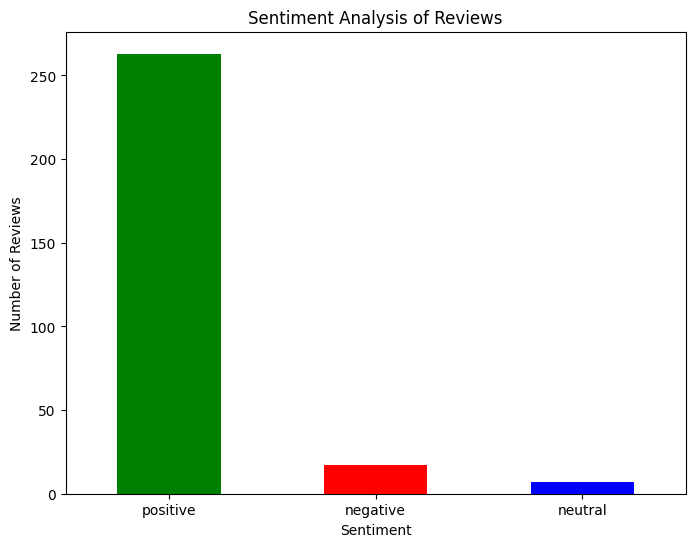

In [321]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment category
sentiment_counts = df['vader_sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Analysis of Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

In [322]:
df.head()

,User_name,Review_text,cleaned_text,no_stopwords,tokens,final_text,vader_scores,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment
0,Sharu Joseph John,Had a great experience at Tim Hortons thanks t...,had a great experience at tim hortons thanks t...,great experience thanks lee ann warm smile qui...,"[great, experience, thanks, lee, ann, warm, sm...","[great, experience, thanks, lee, ann, warm, sm...","{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'comp...",0.000,0.185,0.815,0.9485,positive
1,Sumit Toliya,Burnt Bagel at Tim Hortons\n\nAs a regular cus...,burnt bagel at tim hortons\n\nas a regular cus...,burnt bagel regular customer spends daily real...,"[burnt, bagel, regular, customer, spends, dail...","[burnt, bagel, regular, customer, spends, dail...","{'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'comp...",0.326,0.674,0.000,-0.5256,negative
2,Lynn Anne,This review is for Lee Ann and Austin.\nI just...,this review is for lee ann and austin\ni just ...,review lee ann austin wish commend exceptional...,"[review, lee, ann, austin, wish, commend, exce...","[review, lee, ann, austin, wish, commend, exce...","{'neg': 0.0, 'neu': 0.431, 'pos': 0.569, 'comp...",0.000,0.431,0.569,0.9260,positive
3,Harshil Chudasama,"Lee Ann is a vibrant and dynamic individual, s...",lee ann is a vibrant and dynamic individual sl...,lee ann vibrant dynamic individual slightly yo...,"[lee, ann, vibrant, dynamic, individual, sligh...","[lee, ann, vibrant, dynamic, individual, sligh...","{'neg': 0.0, 'neu': 0.586, 'pos': 0.414, 'comp...",0.000,0.586,0.414,0.8834,positive
4,Aleena mery Shibu,I had an absolutely wonderful experience at th...,i had an absolutely wonderful experience at th...,absolutely wonderful experience incredibly fri...,"[absolutely, wonderful, experience, incredibly...","[absolutely, wonderful, experience, incredibly...","{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.000,0.323,0.677,0.9573,positive


# **Machine Learning approach**
ML approach is also known as Document Classificaton. It uses ML algorithm to classify the text data.

The most important in ML approach is to convert the text to the vector or other numeric format to make the algorithms understand the text as a feature.

Vectorization : CountVectorizer, TfidfTransformer

Model: Logistic Regression, RandomForest, SupportVectorMachine

In [323]:
from sklearn.model_selection import StratifiedKFold, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [324]:
df.final_text

,final_text
0,"[great, experience, thanks, lee, ann, warm, sm..."
1,"[burnt, bagel, regular, customer, spends, dail..."
2,"[review, lee, ann, austin, wish, commend, exce..."
3,"[lee, ann, vibrant, dynamic, individual, sligh..."
4,"[absolutely, wonderful, experience, incredibly..."
...,...
282,"[bad, good]"
283,"[best, milkshakes, coffees, ever, tried]"
284,"[must, coffee]"
285,"[nay, nay]"


In [325]:
# Combines the list of tokens (words) into a single string, with a space as the separator.
for i in range(len(df)):
    df['final_text'][i] = " ".join(df['final_text'][i])

In [326]:
df['final_text'][:3]

,final_text
0,great experience thanks lee ann warm smile qui...
1,burnt bagel regular customer spends daily real...
2,review lee ann austin wish commend exceptional...


In [327]:
# Define a mapping for sentiment text to numerical values
sentiment_mapping = {
    'positive': 1,
    'neutral': 2,
    'negative': 0
}

# Overwrite the vader_sentiment column with numerical values
df['vader_sentiment'] = df.vader_sentiment.map(sentiment_mapping)

# Verify the transformation
print(df.vader_sentiment.head())

0    1
1    0
2    1
3    1
4    1
Name: vader_sentiment, dtype: int64


In [328]:
X = df.final_text
y = df.vader_sentiment

print(X.head())
print(y.head())

0    great experience thanks lee ann warm smile qui...
1    burnt bagel regular customer spends daily real...
2    review lee ann austin wish commend exceptional...
3    lee ann vibrant dynamic individual slightly yo...
4    absolutely wonderful experience incredibly fri...
Name: final_text, dtype: object
0    1
1    0
2    1
3    1
4    1
Name: vader_sentiment, dtype: int64


In [329]:
df.head()

,User_name,Review_text,cleaned_text,no_stopwords,tokens,final_text,vader_scores,vader_neg,vader_neu,vader_pos,vader_compound,vader_sentiment
0,Sharu Joseph John,Had a great experience at Tim Hortons thanks t...,had a great experience at tim hortons thanks t...,great experience thanks lee ann warm smile qui...,"[great, experience, thanks, lee, ann, warm, sm...",great experience thanks lee ann warm smile qui...,"{'neg': 0.0, 'neu': 0.185, 'pos': 0.815, 'comp...",0.000,0.185,0.815,0.9485,1
1,Sumit Toliya,Burnt Bagel at Tim Hortons\n\nAs a regular cus...,burnt bagel at tim hortons\n\nas a regular cus...,burnt bagel regular customer spends daily real...,"[burnt, bagel, regular, customer, spends, dail...",burnt bagel regular customer spends daily real...,"{'neg': 0.326, 'neu': 0.674, 'pos': 0.0, 'comp...",0.326,0.674,0.000,-0.5256,0
2,Lynn Anne,This review is for Lee Ann and Austin.\nI just...,this review is for lee ann and austin\ni just ...,review lee ann austin wish commend exceptional...,"[review, lee, ann, austin, wish, commend, exce...",review lee ann austin wish commend exceptional...,"{'neg': 0.0, 'neu': 0.431, 'pos': 0.569, 'comp...",0.000,0.431,0.569,0.9260,1
3,Harshil Chudasama,"Lee Ann is a vibrant and dynamic individual, s...",lee ann is a vibrant and dynamic individual sl...,lee ann vibrant dynamic individual slightly yo...,"[lee, ann, vibrant, dynamic, individual, sligh...",lee ann vibrant dynamic individual slightly yo...,"{'neg': 0.0, 'neu': 0.586, 'pos': 0.414, 'comp...",0.000,0.586,0.414,0.8834,1
4,Aleena mery Shibu,I had an absolutely wonderful experience at th...,i had an absolutely wonderful experience at th...,absolutely wonderful experience incredibly fri...,"[absolutely, wonderful, experience, incredibly...",absolutely wonderful experience incredibly fri...,"{'neg': 0.0, 'neu': 0.323, 'pos': 0.677, 'comp...",0.000,0.323,0.677,0.9573,1


In [330]:
#define models
model_params = {'random_state':42}
model_list = [LogisticRegression(**model_params, solver='liblinear'),
              RandomForestClassifier(**model_params),
              SVC(**model_params)]
model_names = ['LogisticRegression', 'RandomForest', 'SupportVectorMachine']

#Converts text into a matrix of token counts (bag-of-words).
c = CountVectorizer()
X_c = c.fit_transform(X)

#Converts text into a matrix of term frequency-inverse document frequency (TF-IDF) values.
tf = TfidfVectorizer()
X_tf = tf.fit_transform(X)

#cross validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#traing and validation
for model, model_name in zip(model_list, model_names):
    for n_fold, (trn_idx, vld_idx) in enumerate(skf.split(df.index, df.vader_sentiment)):
        X_c_trn = X_c[trn_idx]#train using train indices
        X_tf_trn = X_tf[trn_idx]
        y_trn = df.loc[trn_idx, 'vader_sentiment']

        X_c_vld = X_c[vld_idx]#validate using validate indices
        X_tf_vld = X_tf[vld_idx]
        y_vld = df.loc[vld_idx, 'vader_sentiment']

        model.fit(X_c_trn, y_trn)
        c_pred_col = f"{model_name}_ct_pred"
        df.loc[vld_idx, c_pred_col] = model.predict(X_c_vld)

        model.fit(X_tf_trn, y_trn)
        tf_pred_col = f"{model_name}_tf_pred"
        df.loc[vld_idx, tf_pred_col] = model.predict(X_tf_vld)

    #accuracy calculation
    print(f"Model: {model_name}, CountVectorizer, Accuracy: {accuracy_score(df.vader_sentiment, df[c_pred_col]):.2%}")
    print(f"Model: {model_name}, TfidfVectorizer, Accuracy: {accuracy_score(df.vader_sentiment, df[tf_pred_col]):.2%}\n")


Model: LogisticRegression, CountVectorizer, Accuracy: 95.12%
Model: LogisticRegression, TfidfVectorizer, Accuracy: 91.64%

Model: RandomForest, CountVectorizer, Accuracy: 95.12%
Model: RandomForest, TfidfVectorizer, Accuracy: 95.12%

Model: SupportVectorMachine, CountVectorizer, Accuracy: 94.43%
Model: SupportVectorMachine, TfidfVectorizer, Accuracy: 94.43%

